In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
data_dict = {'z': [], 'location': [], 'convo': [], 'class': []}

for z in range(2255):
    file_name = f"Logs/log_{z}.xml"
    
    try:
        tree = ET.parse(file_name)
        root = tree.getroot()
        
        temp_data = {'z': z, 'location': None, 'convo': None, 'class': None}
        
        for child in root:
            tag = child.tag
            text = child.text
            if tag in temp_data:
                temp_data[tag] = text
        
        for key, value in temp_data.items():
            data_dict[key].append(value)
            
    except FileNotFoundError:
        print(f"File not found: {file_name}")
    except ET.ParseError:
        print(f"Error parsing XML: {file_name}")

df = pd.DataFrame(data_dict)

Error parsing XML: log_317.xml
Error parsing XML: log_1768.xml


In [5]:
def extract_countries(text):
    doc = nlp(text)
    countries = []
    for ent in doc.ents:
        if ent.label_ == "GPE":
            countries.append(ent.text)
    return countries

df['mentioned_countries'] = df['convo'].apply(extract_countries)

In [6]:
filtered_df = df[df['mentioned_countries'].apply(len) > 0]

In [8]:
filtered_df[['location_1', 'location_2']] = filtered_df['location'].str.split(',', expand=True)

C:\Users\user\AppData\Local\Temp\ipykernel_27744\43721689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['location_1', 'location_2']] = filtered_df['location'].str.split(',', expand=True)
C:\Users\user\AppData\Local\Temp\ipykernel_27744\43721689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['location_1', 'location_2']] = filtered_df['location'].str.split(',', expand=True)


In [20]:
filtered_df['location_1'] = filtered_df['location_1'].astype(int)
filtered_df['location_2'] = filtered_df['location_2'].astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_27744\352001649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['location_1'] = filtered_df['location_1'].astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_27744\352001649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['location_2'] = filtered_df['location_2'].astype(int)


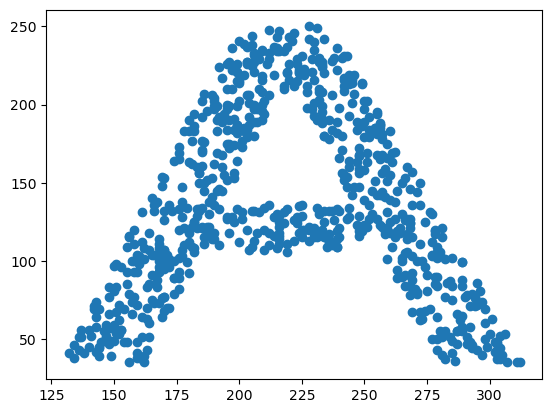

In [21]:
import matplotlib.pyplot as plt
plt.scatter(filtered_df['location_1'], filtered_df['location_2'], label='Points')